In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("co2_emission.csv")

In [23]:
emi_data=data[data.Year==2020]
emi_data

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World
270,Afghanistan,AF,93,2020,192848747,41128771.0,652230.0,0.40%
541,Albania,AL,355,2020,285502507,2842321.0,28748.0,0.00%
812,Algeria,DZ,213,2020,4587131635,44903225.0,2381741.0,1.60%
1083,Andorra,AD,376,2020,15070878,79824.0,468.0,0.00%
1354,Angola,AO,244,2020,682260326,35588987.0,1246700.0,0.80%
...,...,...,...,...,...,...,...,...
58535,Vietnam,VN,84,2020,3977272058,98186856.0,331212.0,0.20%
58806,Wallis and Futuna,WF,681,2020,507247,NaN,NaN,NaN
59077,Yemen,YE,967,2020,624654156,33696614.0,527968.0,0.40%
59348,Zambia,ZM,260,2020,247987833,20017675.0,752612.0,0.50%


In [163]:

Y=emi_data['CO2 emission (Tons)'].nlargest(7)
X=emi_data.loc[Y.index,"Country"]
Y_pop=emi_data.loc[Y.index,"Population(2022)"]

In [164]:
Total_Popul=emi_data['Population(2022)'].sum(skipna=True)
Total_emis=emi_data['CO2 emission (Tons)'].sum(skipna=True)
others_popul=Total_Popul-Y_pop.sum()
others_emis=Total_emis-Y.sum()

print(others_emis,others_popul)

Y_emis_o=np.append(np.array(Y),others_emis)
Y_pop_o=np.append(np.array(Y_pop),others_popul)
X_o=np.append(np.array(X),"Rest of the World")

595249308332 4223934977.0


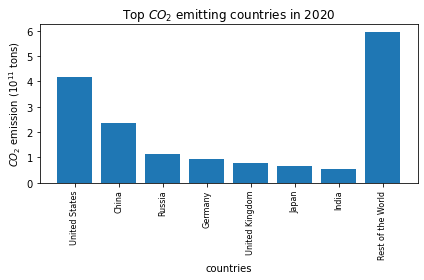

In [177]:
plt.bar(X_o,Y_emis_o*10**(-11))
plt.title("Top $CO_2$ emitting countries in 2020")
plt.xlabel("countries")
plt.ylabel("$CO_2$ emission ($10^{11}$ tons)")
plt.xticks(X_o, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tight_layout()
plt.savefig("f1.svg",format='svg')
plt.show()

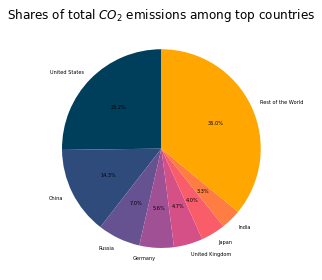

In [188]:
colors=["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600"]
#colors=["#00876c","#57a374","#8fbe7e","#c6d88d","#fff1a3","#f9c87a","#f29d5f","#e66f52","#d43d51"]
plt.pie(Y_emis_o,labels=X_o,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize': 5})
#plt.tight_layout()
#plt.legend(loc='best')
plt.title("Shares of total $CO_2$ emissions among top countries")
plt.tight_layout()
plt.savefig("pie1.svg",format='svg')
plt.show()

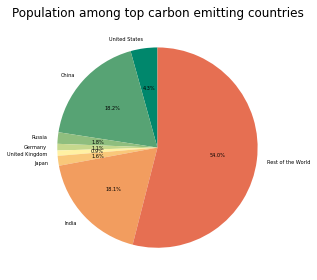

In [187]:
colors=["#00876c","#57a374","#8fbe7e","#c6d88d","#fff1a3","#f9c87a","#f29d5f","#e66f52","#d43d51"]
plt.pie(Y_pop_o,labels=X_o,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize': 5})
#plt.tight_layout()
#plt.legend(loc='best')
plt.title("Population among top carbon emitting countries")
plt.tight_layout()
plt.savefig("pie2.svg",format='svg')
plt.show()